In [32]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git /content/gdrive/MyDrive/colab_images

#!pip freeze > requirements.txt


fatal: destination path '/content/gdrive/MyDrive/colab_images' already exists and is not an empty directory.


In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from skimage.feature import hog
from skimage import io, transform

import os

In [4]:
def load_images(path, label):

  images = []
  labels = []

  for filename in os.listdir(path):
    try:
      img = io.imread(os.path.join(path, filename))
      img = transform.resize(img, (64, 64))

      images.append(img)
      labels.append(label)
    except Exception as e:
      print(e)

  return np.array(images), np.array(labels)

In [5]:
cats_path = 'small/cats'
dogs_path = 'small/dogs'

cats_images, cats_labels = load_images(cats_path, 0)
dogs_images, dogs_labels = load_images(dogs_path, 1)

all_images = np.concatenate([cats_images, dogs_images])
all_labels = np.concatenate([cats_labels, dogs_labels])

In [6]:
hog_features = []

for image in all_images:
    # Compute HOG features with visualization disabled
    fd, _ = hog(
        image,
        orientations=8,
        pixels_per_cell=(8, 8),
        cells_per_block=(1, 1),
        visualize=True,  # Enable visualization if you also want the HOG image
        channel_axis=-1 if image.ndim == 3 else None  # Handle RGB/multichannel and grayscale images
    )
    hog_features.append(fd)

# Convert list to a numpy array for further processing
hog_features = np.array(hog_features)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    hog_features,
    all_labels,
    test_size=0.2,
    random_state=42
  )

In [8]:
# clf = LogisticRegression(max_iter=5000)
# clf.fit(X_train, y_train)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       500
           1       0.69      0.68      0.68       500

    accuracy                           0.68      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.68      0.68      0.68      1000



In [ ]:
# day 38 begins here

In [13]:
import pickle

file_name = 'cat_dog_svm.pkl'

with open(file_name, 'wb') as f: # write binary
  pickle.dump(clf, f)

In [15]:
def predict_image(image_path, model, scaler):
  try:
    img = io.imread(image_path)
    img = transform.resize(img, (64, 64))

    fd, _ = hog(
        image,
        orientations=8,
        pixels_per_cell=(8, 8),
        cells_per_block=(1, 1),
        visualize=True,  # Enable visualization if you also want the HOG image
        channel_axis=-1 if img.ndim == 3 else None  # Handle RGB/multichannel and grayscale images
    )

    fd = np.array(fd).reshape(1, -1) #Reshape

    if scaler:
        fd = scaler.transform(fd) #Scale if scaler is provided

    prediction = model.predict(fd)
    return prediction[0]
  except Exception as e:
    print(e)


In [16]:
saved_model_in_file = 'cat_dog_svm.pkl'

with open(saved_model_in_file, 'rb') as f:
  saved_model = pickle.load(f)

In [18]:
!wget https://t4.ftcdn.net/jpg/02/66/72/41/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg

!wget https://goofytails.com/cdn/shop/files/labrador-retriever_1000x.jpg?v=1701077639

--2024-12-15 10:05:47--  https://t4.ftcdn.net/jpg/02/66/72/41/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41304 (40K) [image/jpeg]
Saving to: ‘360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg’

360_F_266724172_Iy8 100%[===================>]  40.34K  --.-KB/s    in 0.001s  

2024-12-15 10:05:47 (53.8 MB/s) - ‘360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg’ saved [41304/41304]

--2024-12-15 10:05:47--  https://goofytails.com/cdn/shop/files/labrador-retriever_1000x.jpg?v=1701077639
Resolving goofytails.com (goofytails.com)... 23.227.38.65
Connecting to goofytails.com (goofytails.com)|23.227.38.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118727 (116K) [image/jpeg]
Saving to: ‘labrador-retriever_1000x.jpg?v=1701077639’

labr

In [31]:
image_path = 'train/cats/cat.10067.jpg'
prediction = predict_image(image_path, saved_model, None)
print(prediction)

if prediction == 0:
  print('Cat')
else:
  print('Dog')

1
Dog


Image Name is 0


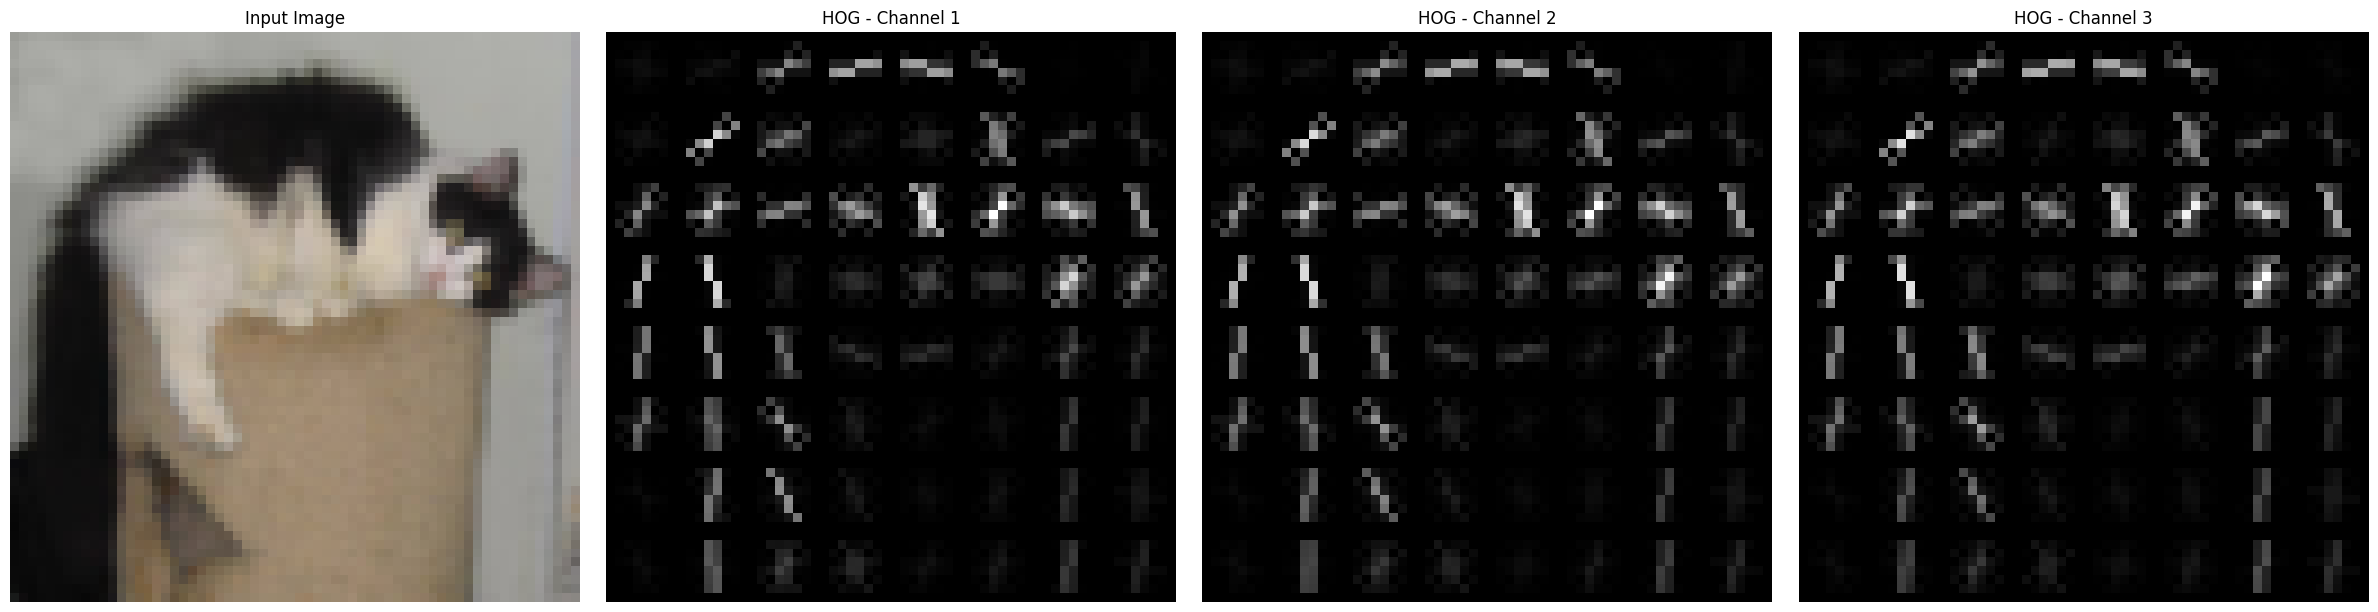

In [12]:

import matplotlib.pyplot as plt
from skimage import exposure

def hog_demo():

  image = all_images[4]
  print(f'Image Name is {all_labels[4]}')

  # Ensure consistent handling of grayscale and color images
  if image.ndim == 2:  # Grayscale image
    num_channels = 1
    processed_image = [image]  # Wrap grayscale image in a list for consistency
  elif image.ndim == 3 and image.shape[2] in [3, 4]:  # RGB/RGBA image
    num_channels = image.shape[2]
    processed_image = [image[..., c] for c in range(num_channels)]  # Split channels
  else:
    raise ValueError("Input image must be 2D (grayscale) or 3D (RGB/RGBA).")

  # Initialize the figure
  fig, axes = plt.subplots(1, num_channels + 1, figsize=(6 * (num_channels + 1), 6), sharex=True, sharey=True)

  # Input image visualization
  axes[0].imshow(image, cmap='gray' if num_channels == 1 else None)
  axes[0].set_title("Input Image")
  axes[0].axis('off')

  # Process each channel separately for HOG
  for i, channel in enumerate(processed_image):
    # Compute HOG features and visualization
    fd, hog_image = hog(
        channel,
        orientations=8,
        pixels_per_cell=(8, 8),
        cells_per_block=(1, 1),
        visualize=True,
        channel_axis=None,  # Explicitly mention that channels are not present
    )
    # Rescale HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Display HOG visualization for the current channel
    axes[i + 1].imshow(hog_image_rescaled, cmap='gray')
    axes[i + 1].set_title(f"HOG - Channel {i + 1}")
    axes[i + 1].axis('off')

  plt.tight_layout()
  plt.show()

hog_demo()